## Bike Data Science Project

### Exploratoty analysis and reproducible science

#### Tutorial by Jake VanderPlas of University of Washington

##### Moving into the city means heading west. 

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1f123a59648>)

In [3]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True) 
#Above makes the first column the date column and changes the dates from strings to dates
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


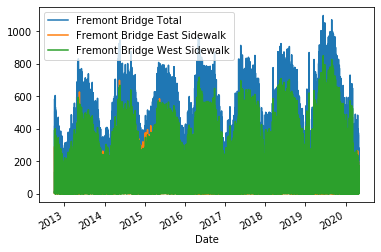

In [4]:
import matplotlib 
%matplotlib inline 
#This plots the chart in JN, not in seperate window
data.plot();
#This looks messy with lots of overlying data

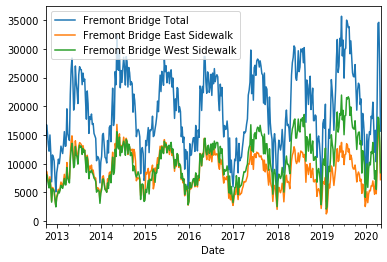

In [5]:
%matplotlib inline
data.resample('w').sum().plot();
#This looks much better. The data is sampled of the sum by on weekly basis. 'M' monthly, 'Q' would be quarterly

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


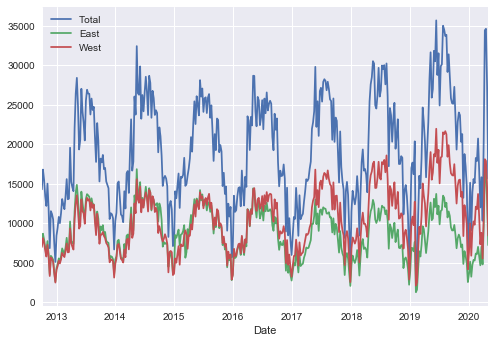

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ['Total' , 'East', 'West' ] # Renames the big ugly Legend 

data.resample('w').sum().plot();

print(plt.style.available) #Curious about all the different styles 

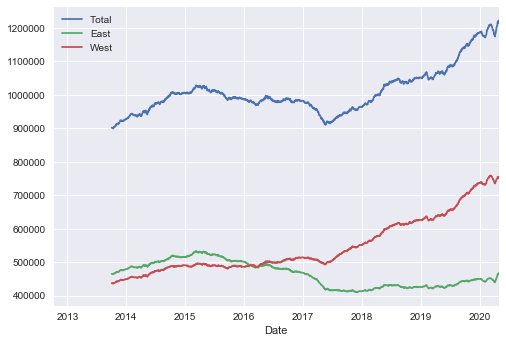

In [7]:
data.resample('D').sum().rolling(365).sum().plot(); # rolling is a moving total of the past (365)(D) for days
# This is a great way to show anual growth

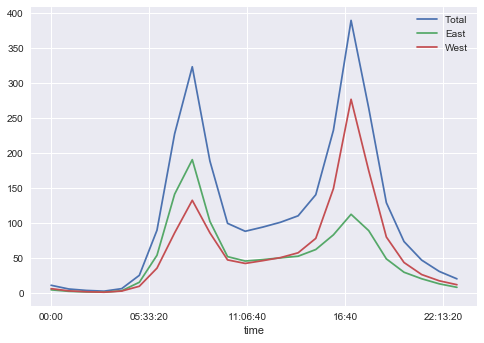

In [8]:
data.groupby(data.index.time).mean().plot(); # When are people riding their bikes

In [9]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


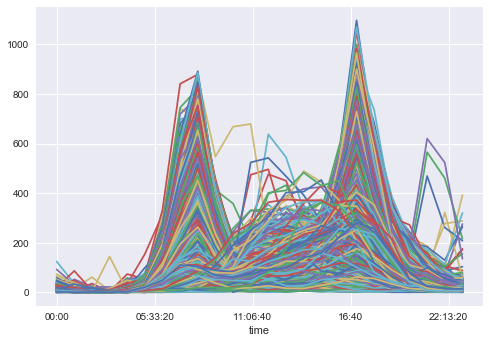

In [10]:
pivoted.plot(legend=False) #if the legend isnt False then the legend is 365 entries long

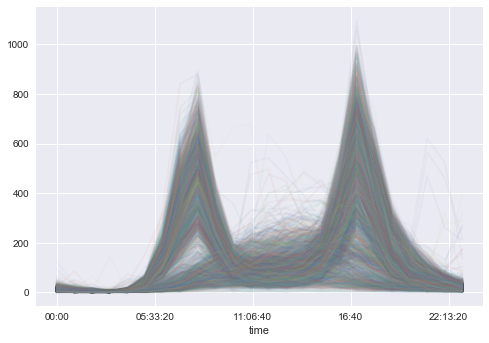

In [11]:
pivoted.plot(legend=False, alpha=.05); #lets make the line more transparent to see the trends

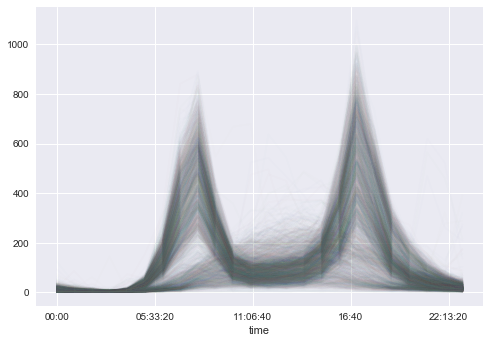

In [12]:
pivoted.plot(legend=False, alpha=.01); #lets make the line more transparent to see the trends

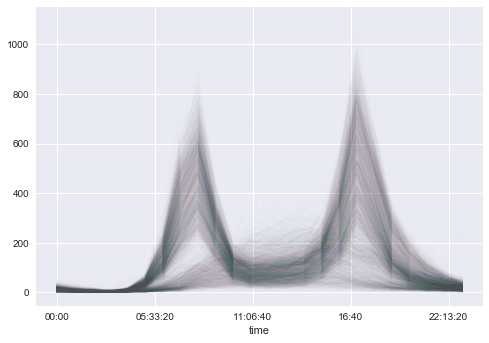

In [13]:
pivoted.plot(legend=False, alpha=.005); #This is maybe too thin. 